In [1]:
#Importing the Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans
from termcolor import colored
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('Crop_Recommendation.csv')
df.shape

(2200, 8)

In [3]:
# Checking for null values
print(df.isnull().sum())
# Displaying the first few records of the dataset
df.head()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
# Visualizing the relationships between various features and crops
def plot_feature_vs_crop(feature):
    plt.figure(figsize=(15, 7))
    sns.barplot(x=df['label'], y=df[feature])
    plt.xlabel('Crops')
    plt.ylabel(feature)
    plt.title(f'{feature} in Different Crops')
    plt.xticks(rotation=45)
    plt.show()

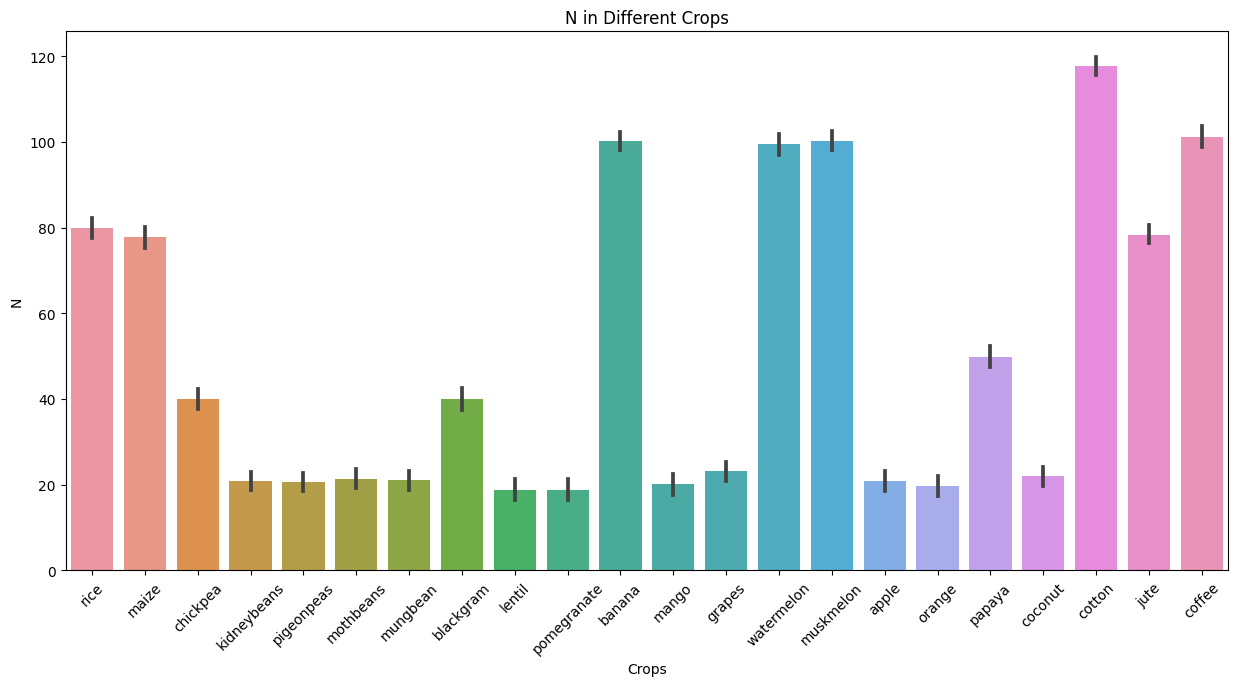

In [5]:
plot_feature_vs_crop('N')

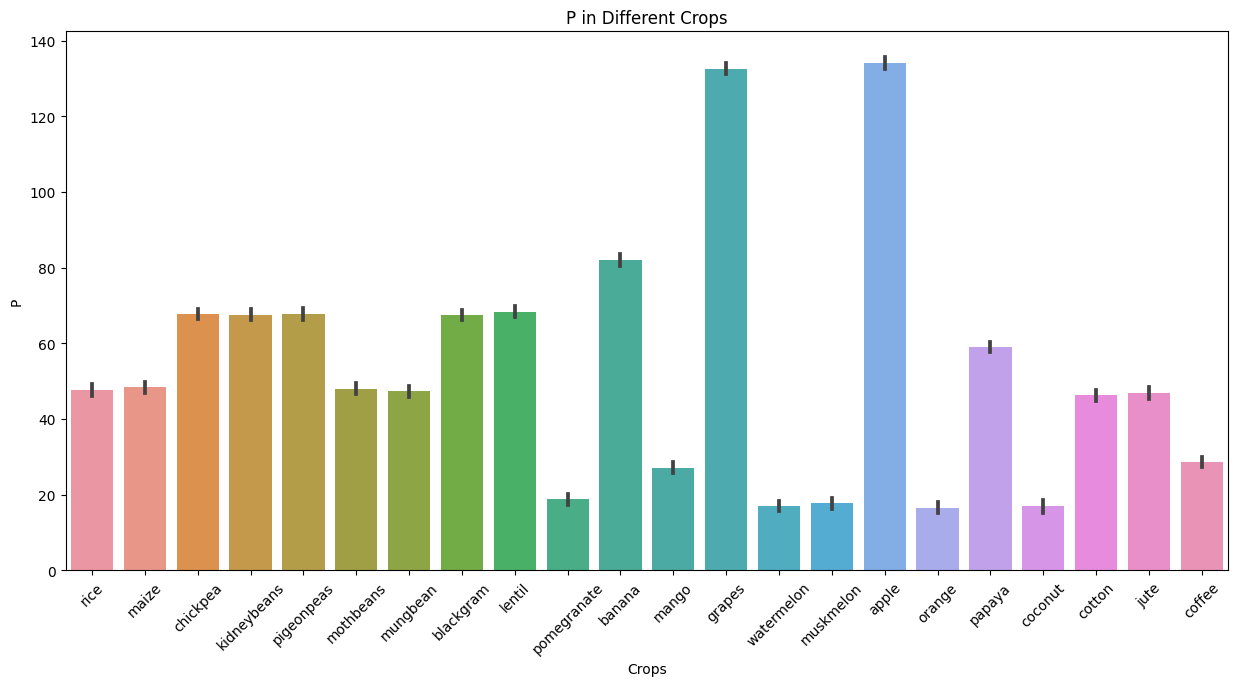

In [6]:
plot_feature_vs_crop('P')

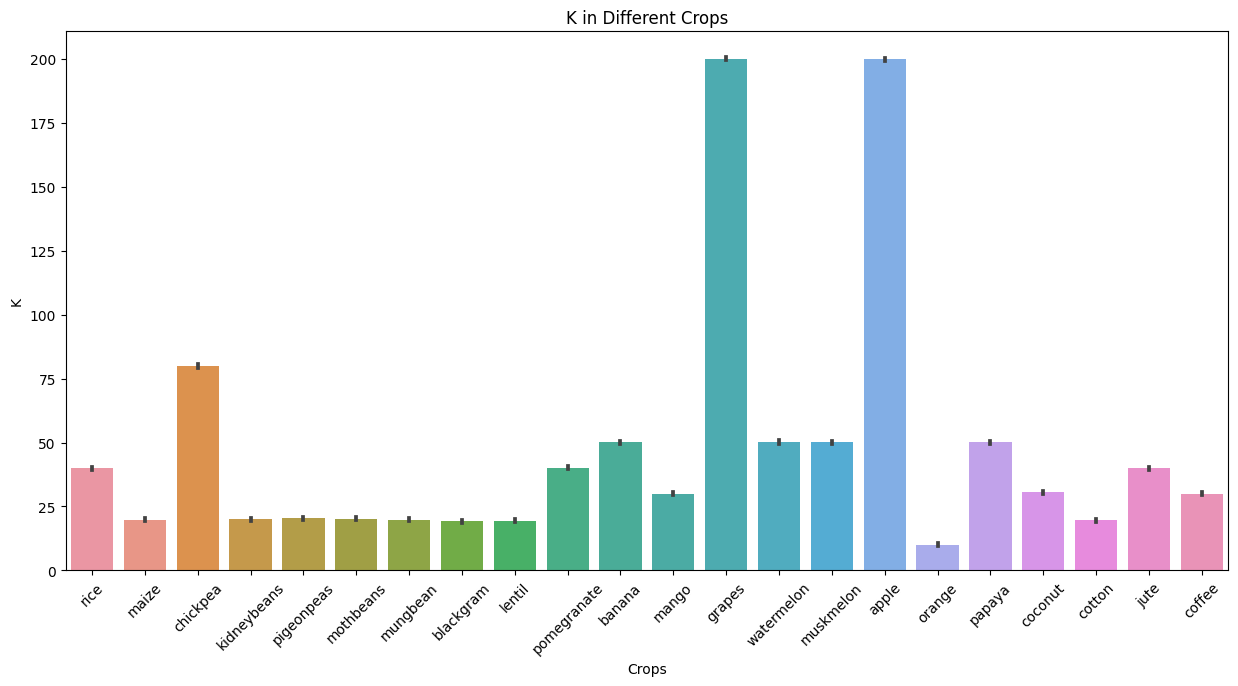

In [7]:
plot_feature_vs_crop('K')

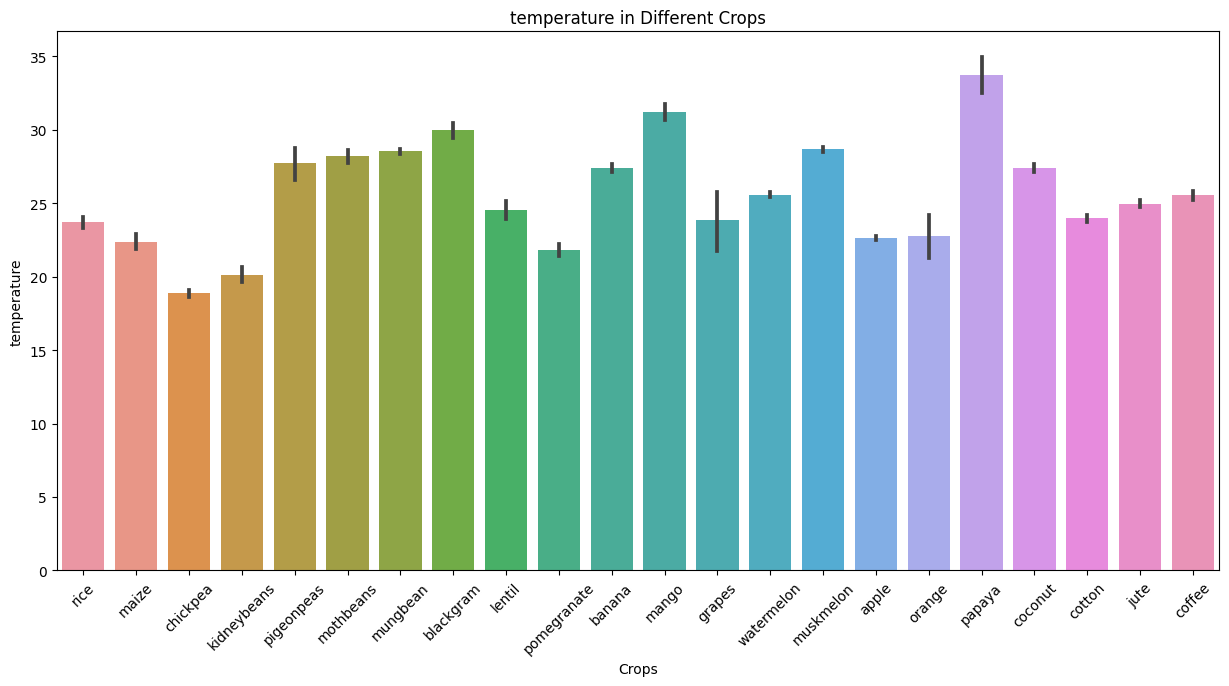

In [8]:
plot_feature_vs_crop('temperature')

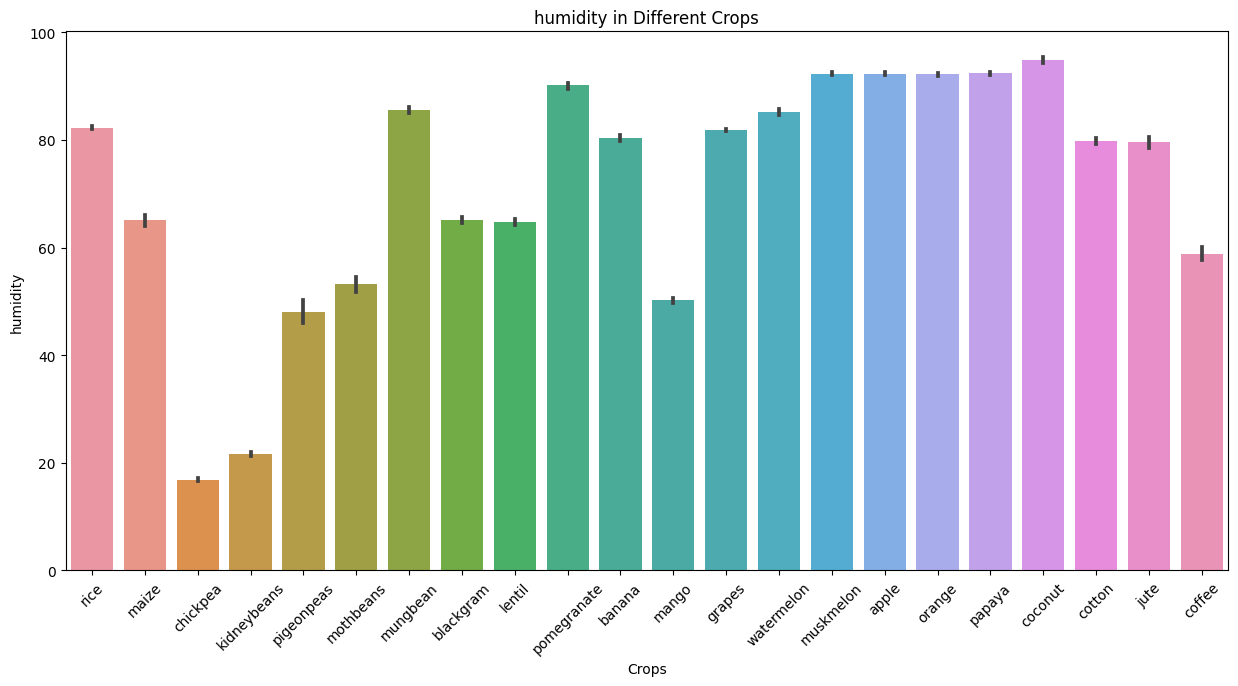

In [9]:
plot_feature_vs_crop('humidity')

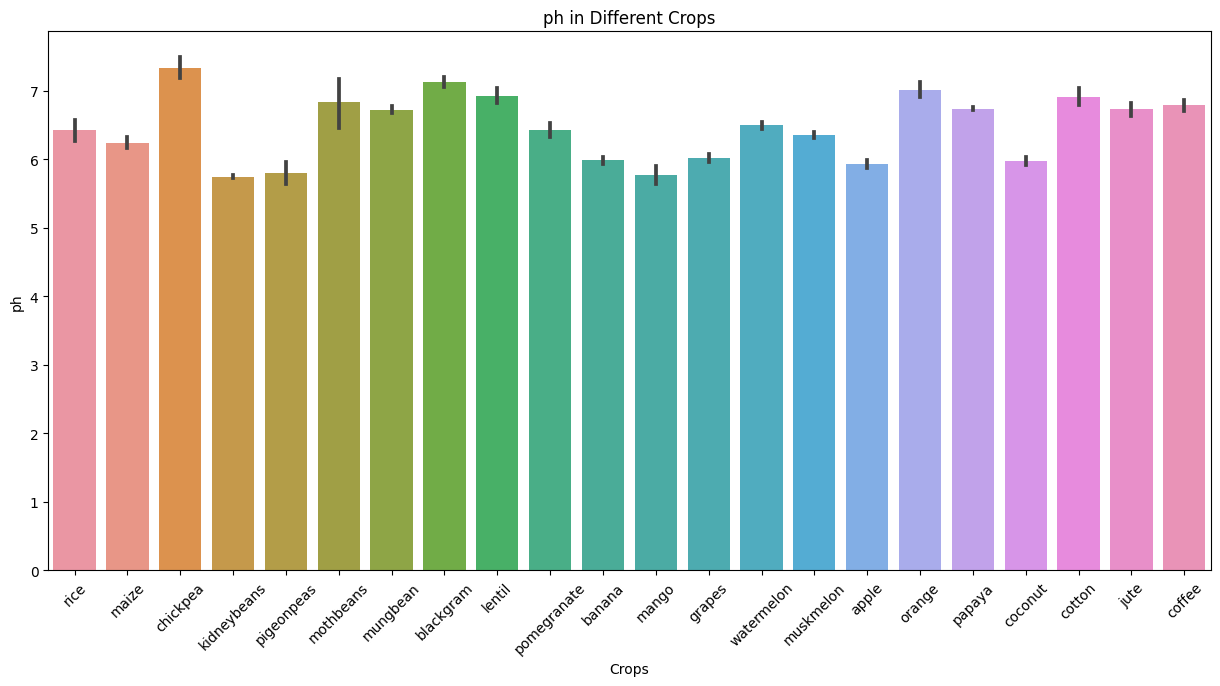

In [10]:
plot_feature_vs_crop('ph')

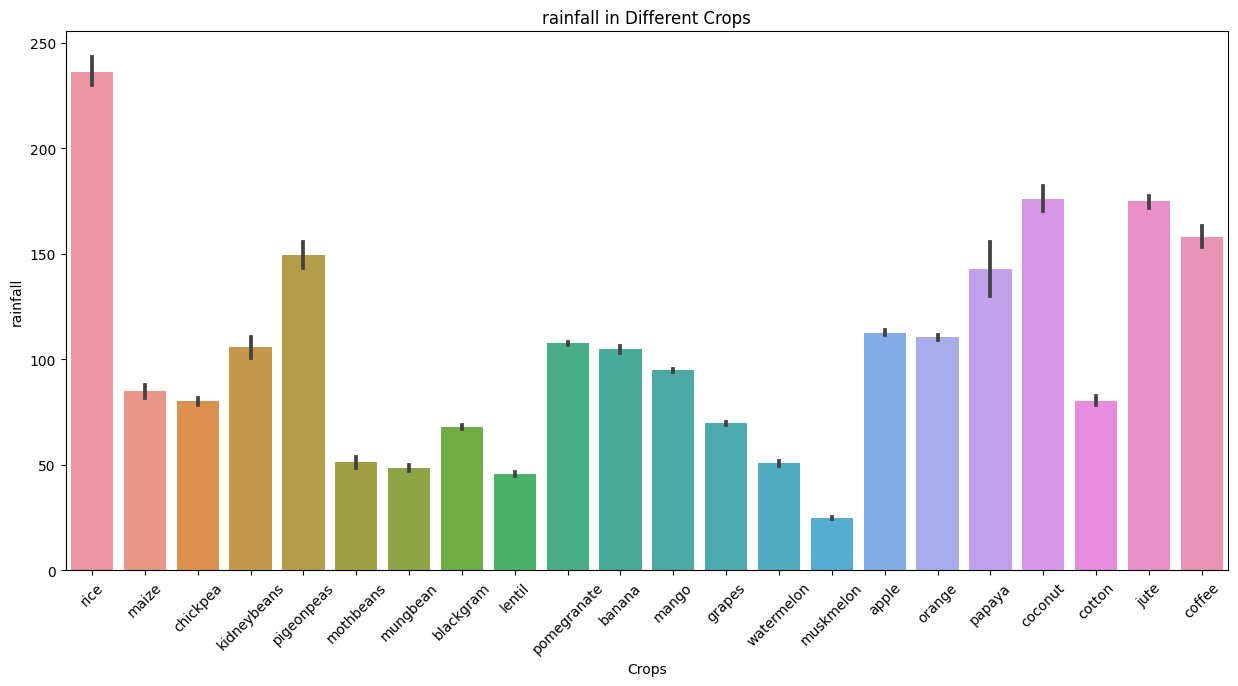

In [11]:
plot_feature_vs_crop('rainfall')

In [12]:
# Calculate average values of the features
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
averages = df[features].mean()

# Print out the average values
print("Average Values of Features:")
for feature, avg in zip(features, averages):
    print(f"{feature}: {avg:.2f}")

Average Values of Features:
N: 50.55
P: 53.36
K: 48.15
temperature: 25.62
humidity: 71.48
ph: 6.47
rainfall: 103.46


In [13]:
# Features and Labels
X = df.drop(columns=['label'])
y = df['label']

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Clustering

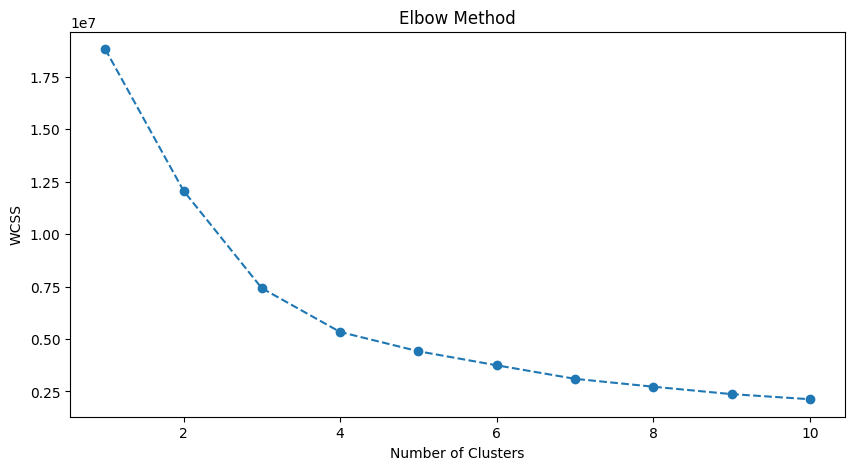

In [14]:
# KMeans clustering
x = df.drop(['label'], axis=1).values
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster'] = km.fit_predict(x)

# Elbow Method to Determine Optimal Number of Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Applying KMeans Clustering (I'm using 4 clusters as an example, you should choose based on the Elbow Method)
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster'] = km.fit_predict(x)

In [15]:
# Determine the suitable season for each crop
conditions = [
    (df['temperature'] > 30) & (df['humidity'] > 50),
    (df['temperature'] < 20) & (df['humidity'] > 30),
    (df['rainfall'] > 200) & (df['humidity'] > 30)
]
choices = ['Summer', 'Winter', 'Rainy']
df['season'] = np.select(conditions, choices, default='Unknown')

# Display crops in each cluster
print("Crops in Each Cluster:\n")
for cluster in sorted(df['cluster'].unique()):
    crops = ", ".join(sorted(df[df['cluster'] == cluster]['label'].unique()))
    print(f"Cluster {cluster}--> {crops}")

Crops in Each Cluster:

Cluster 0--> apple, grapes
Cluster 1--> blackgram, chickpea, coconut, kidneybeans, lentil, maize, mango, mothbeans, mungbean, orange, papaya, pigeonpeas, pomegranate
Cluster 2--> banana, coffee, cotton, maize, muskmelon, papaya, watermelon
Cluster 3--> coconut, coffee, jute, papaya, pigeonpeas, rice


In [16]:
# Display crops suitable for each season
print("\nCrops Suitable for Each Season:\n")
for season in sorted(df['season'].unique()):
    crops = ", ".join(sorted(df[df['season'] == season]['label'].unique()))
    print(f"{season.capitalize()} Season---> {crops}")


Crops Suitable for Each Season:

Rainy Season---> coconut, papaya, rice
Summer Season---> blackgram, grapes, mango, mothbeans, orange, papaya, pigeonpeas
Unknown Season---> apple, banana, blackgram, chickpea, coconut, coffee, cotton, grapes, jute, kidneybeans, lentil, maize, mango, mothbeans, mungbean, muskmelon, orange, papaya, pigeonpeas, pomegranate, rice, watermelon
Winter Season---> grapes, lentil, maize, orange, pigeonpeas, pomegranate


# Regression Models

In [17]:
# Dictionary to hold model names and their respective accuracy scores
model_accuracy = {}

# Function to build and evaluate the model
def build_and_evaluate_model(model, name):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    model_accuracy[name] = accuracy
    print(f"Accuracy of {name}: {accuracy}")
    print(classification_report(y_test, predictions))
    return model

In [18]:
# Logistic Regression
log_reg = build_and_evaluate_model(LogisticRegression(random_state=42),'Logistic Regression')

Accuracy of Logistic Regression: 0.9681818181818181
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      

In [19]:
# Decision Tree
decision_tree = build_and_evaluate_model(DecisionTreeClassifier(random_state=42), 'Decision Tree')

Accuracy of Decision Tree: 0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      0.95      0.98        22
    chickpea       0.92      1.00      0.96        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.95      0.95      0.95        21
 kidneybeans       1.00      0.90      0.95        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.96      1.00      0.98        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [20]:
# Random Forest
random_forest = build_and_evaluate_model(RandomForestClassifier(n_estimators=20, random_state=0), 'Random Forest')

Accuracy of Random Forest: 0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.95      0.95      0.95        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [21]:
# Support Vector Machine
svm = build_and_evaluate_model(SVC(gamma='auto'), 'Support Vector Machine')

Accuracy of Support Vector Machine: 0.12727272727272726
              precision    recall  f1-score   support

       apple       1.00      0.50      0.67        18
      banana       1.00      0.11      0.20        18
   blackgram       0.00      0.00      0.00        22
    chickpea       1.00      0.09      0.16        23
     coconut       0.04      1.00      0.07        15
      coffee       1.00      0.06      0.11        17
      cotton       1.00      0.44      0.61        16
      grapes       1.00      0.06      0.11        18
        jute       0.00      0.00      0.00        21
 kidneybeans       0.00      0.00      0.00        20
      lentil       0.00      0.00      0.00        17
       maize       0.00      0.00      0.00        18
       mango       1.00      0.05      0.09        21
   mothbeans       0.00      0.00      0.00        25
    mungbean       1.00      0.24      0.38        17
   muskmelon       1.00      0.30      0.47        23
      orange       0.00  

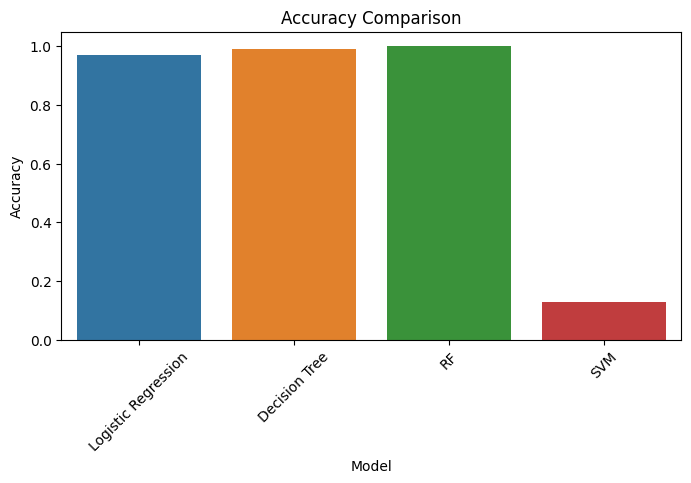

In [22]:
# Replace with actual model accuracy
model_accuracy = {
    'Logistic Regression': 0.97,
    'Decision Tree': 0.99,
    'RF': 1.00,
    'SVM': 0.13
}

# Plotting the accuracies of the models
plt.figure(figsize=(8, 4))
sns.barplot(x=list(model_accuracy.keys()), y=list(model_accuracy.values()))
plt.title('Accuracy Comparison')
plt.xlabel('Model')  
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


In [23]:
# Define the model names and their corresponding accuracy values
model_names = list(model_accuracy.keys())
accuracy_values = list(model_accuracy.values())

# Printing each model with its accuracy value
for model, accuracy in zip(model_names, accuracy_values):
    print(model, '--->', accuracy)

Logistic Regression ---> 0.97
Decision Tree ---> 0.99
RF ---> 1.0
SVM ---> 0.13


In [24]:
# Example of making predictions using the Random Forest model
input_data = np.array([[84, 46, 61, 29, 71, 8, 151]])
prediction = random_forest.predict(input_data)
print(f"Recommended Crop for Given Climate Conditions: {prediction[0]}")


Recommended Crop for Given Climate Conditions: jute


In [25]:
# Example of making predictions using the Random Forest model
input_data = np.array([[103,19, 31, 23, 61, 7, 141]])
prediction = random_forest.predict(input_data)
print(f"Recommended Crop for Given Climate Conditions: {prediction[0]}")

Recommended Crop for Given Climate Conditions: coffee
